# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


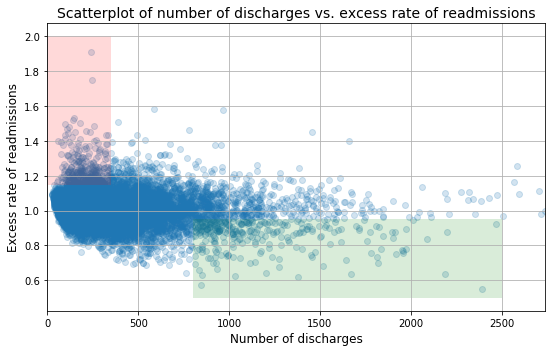

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

No, the above analysis concluded that there is a significant correlation between hospital capacity (number of discharges) and readmission rates. The political recommendations were made based on this conclusion.

However, the correlation observed in this case (mainly from a scatterplot) lacks the statistical analysis to back it up. More thorough statistical analysis/hypothesis test should be performed to verify that the correlation between hospital capcity (numberof discharges) and readmission rates are statistically significant.

In addition, missing data are noticed in the 'Excess Readmission Ratio' column. They should be taken care of before any statistical analysis.

In [5]:
# clean up missing data in 'Excess Readmission Ratio' column
clean_hospital_read_df_2 = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'])
print(clean_hospital_read_df_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB
None


## B. Provide support for your arguments and your own recommendations with a statistically sound analysis: 
### 1. Setup an appropriate hypothesis test.
### 2. Compute and report the observed significance value (or p-value).
### 3. Report statistical significance for $\alpha$ = .01.

<p>Null hypothesis: there is no correlation between hospital capacity (number of discharges) and readmission rates.</p> 
<p>Alternative hypothesis: there is a correlation between hospital capacity (number of discharges) and readmission rates.</p> 
<p>Test statistics: pearson correlation coefficient $\rho$ </p>
<p>Significance level: $\alpha$ = 0.01 </p>

In [6]:
x = clean_hospital_read_df_2['Number of Discharges']
y = clean_hospital_read_df_2['Excess Readmission Ratio']

#define function to compute the pearson coefficient between two arrays
def pearson_r(a, b):
    """compute and return the pearson correlation coefficient r between two arrays"""
    corr_mat = np.corrcoef(a,b)
    return corr_mat[0,1]

#compute the observed pearson coefficient in the sample
r = pearson_r(x,y)

#initialize an empty array to store all the bootstrap replicates
bs_reps = np.empty(10000)
#use for loop to generate a desired number of bootstrap replicates
for i in range(10000):
    #permutate x array while keeping y unchanged
    x_perm = np.random.permutation(x)
    #compute test statistic for the bootstrap sample
    bs_reps[i] = pearson_r(x_perm,y)

#compute p-value based on the number of replicates that are at least as extreme as what is observed in the sample
p = np.sum(bs_reps <= r)/len(bs_reps)
#rounding p-value to four digits after the decimal point
p = round(p,4)
print("The observed pearson's correlation coefficient is:", r)
print("p-value is: ", p)

The observed pearson's correlation coefficient is: -0.09739794351079353
p-value is:  0.0


<p>The p-value for the observed Pearson's correlation coefficient is less than 0.0001.</p> 
<p>p-value is less than the set significance level $\alpha$=0.01, therefore, the hypothesis is rejected, and the sample suggests that there is a statistical significance that the hospital capacity (number of discharges) and readmission rates are correlated. </p>

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

**Statistical significance:** refers to the unlikelihood that the test statistic observed in the sample occurs simply by coincidence.
**Practical significance:** deals with taking a decisions based on the outcome of the test statistics, factoring in all real work challenges and constraints. Practical significance depends upon many external factors like cost, time, objective, etc.
**Statistical *vs.* Practical significance:** Statistical significance does not guarantee practical significance, but to be practically significant, a data must be statistically significant.

In this case, the above statistical analysis sugguests that the correlation between hospital capacity (number of discharges) and readmission rates is statistically significant. However, the observed correlation coefficient of -0.093 suggests that the negative correlation is weak. This correlation is less likely to be practically significant, depending on the objectives and constrains:
    * If reducing the readmissions rate is the ultimate goal with top priority and the client is willing to take whatever is necessary even just to lower the readmissions rate a bit, then issuing regulatory policy to increase hospital capacity will help in some extent (not much). 
    * If the client wants to lower the readmission rate at their reasonable effort, given the weak correlation, I won't recommend them to increase the hospital capacity. They should continue to investigate in other possible factors that would influence the readmission rate. 

### 5. Look at the scatterplot above: 

    * What are the advantages and disadvantages of using this plot to convey information? 
Advantage: the dispersion of points in the scatterplot reveals the relationships between two numerical variables. 
Disadvantages: 
    1) Without a regression line, the color shaded areas are exaggerated, this is misleading, because it seems to suggest a much stronger negative correlation.
    2) When the number of data points is large, the points tend to collapse together. With all the overlapping, it's hard to tell the density of the points from a simple scatterplot. The points with extreme values look more prominent, whereas the vast majority of the points are overlaid and hidden. 

    * Construct another plot that conveys the same information in a more direct manner.
Remove the color shades, add kde plot as well as the linear fit to the scatter plot to make the message more clear. 

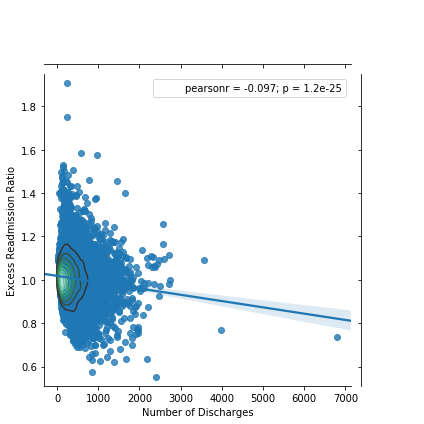

In [7]:
from scipy import stats
import seaborn as sns

#use seaborn to plot jointgrid
g = sns.JointGrid('Number of Discharges', 'Excess Readmission Ratio', clean_hospital_read_df_2)
#add regression plot and kdeplot
g = g.plot_joint(sns.regplot)
g = g.plot_joint(sns.kdeplot)
#add pearson's correlation coefficient
g = g.annotate(stats.pearsonr)